<a href="https://colab.research.google.com/github/rohit958/Coursera_repo/blob/main/CarSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [3]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

##TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

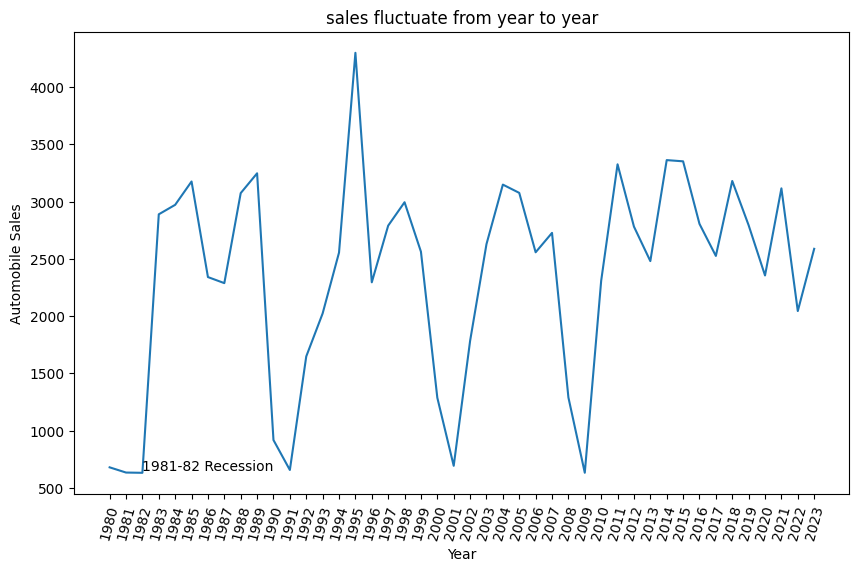

In [4]:
plt.figure(figsize=(10, 6))
df1=df.groupby('Year')['Automobile_Sales'].mean()
df1.plot(kind='line',x='Year',y='Automobile_Sales')
plt.ylabel('Automobile Sales')
plt.xlabel('Year')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.title('sales fluctuate from year to year')
plt.show()

## TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

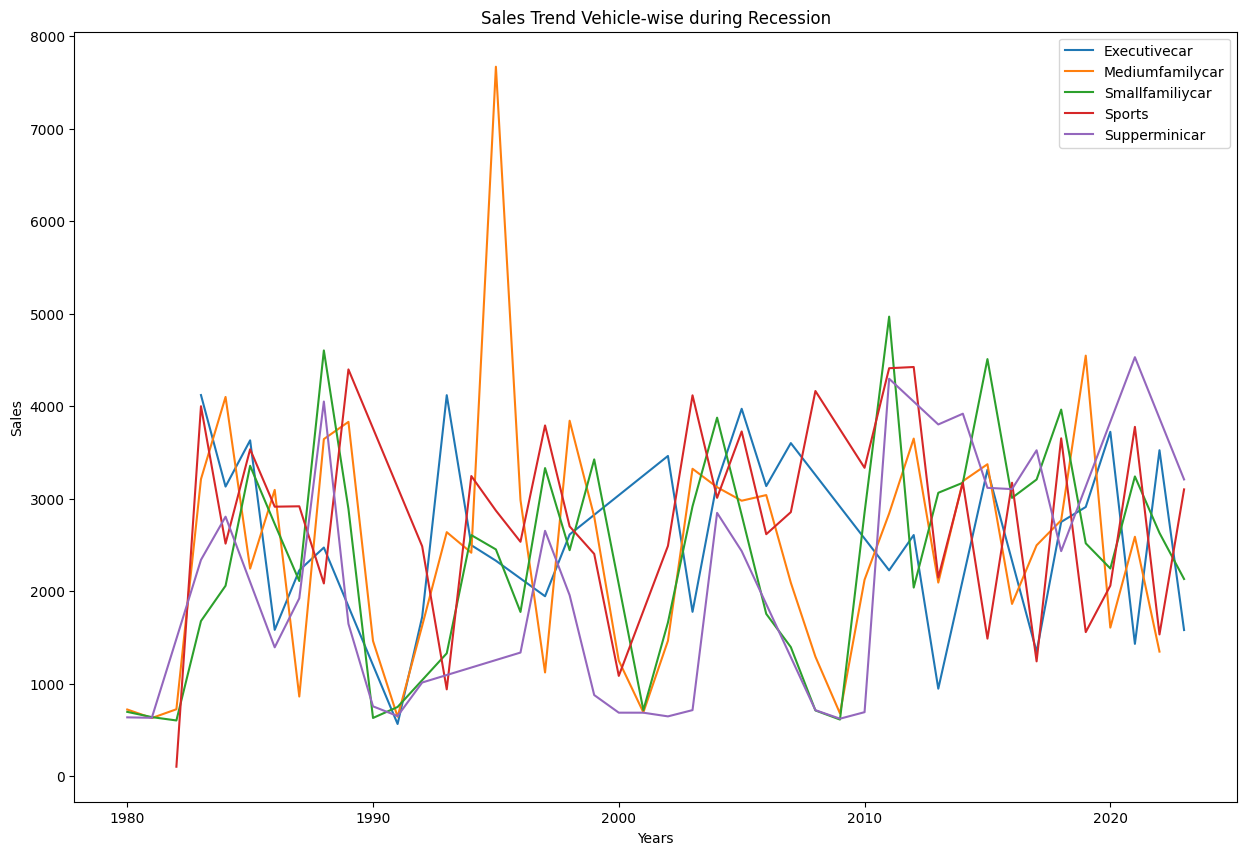

In [5]:
Fig=plt.figure(figsize=(15,10))
df_new=df.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()

df_new.set_index('Year',inplace=True)
df_new = df_new.groupby(['Vehicle_Type'])['Automobile_Sales']
df_new.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

## TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

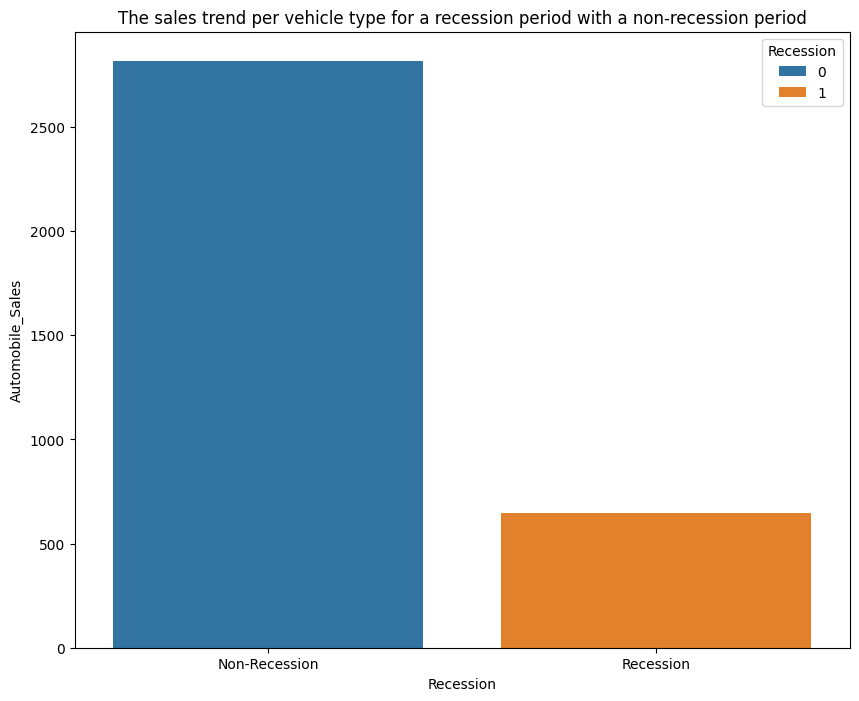

In [14]:
dfbar=df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
fig=plt.figure(figsize=(10,8))
sns.barplot(data=dfbar,x='Recession',y='Automobile_Sales',hue='Recession')
plt.title('The sales trend per vehicle type for a recession period with a non-recession period')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


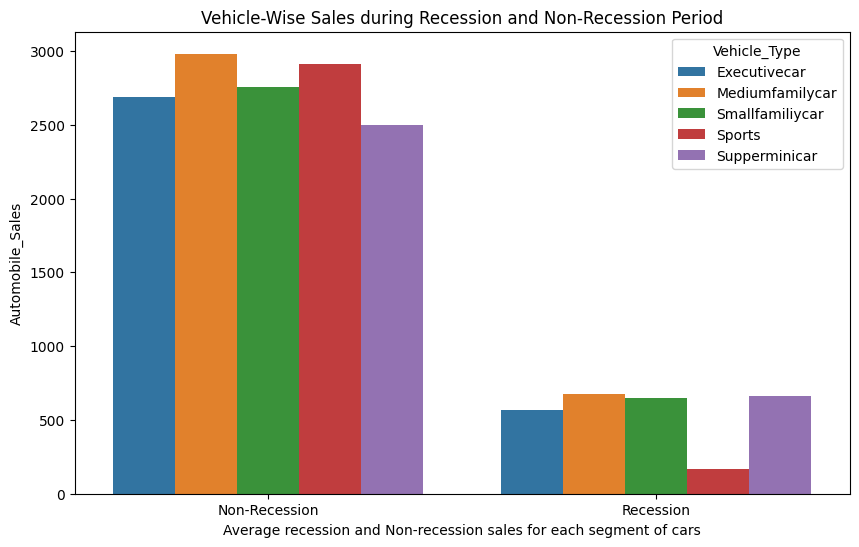

In [33]:
recession_data = df[df['Recession'] == 1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

fig=plt.figure(figsize=(10,6))
sns.barplot(data=dd,x='Recession',y='Automobile_Sales',hue='Vehicle_Type')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.xlabel('Average recession and Non-recession sales for each segment of cars')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


## TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period


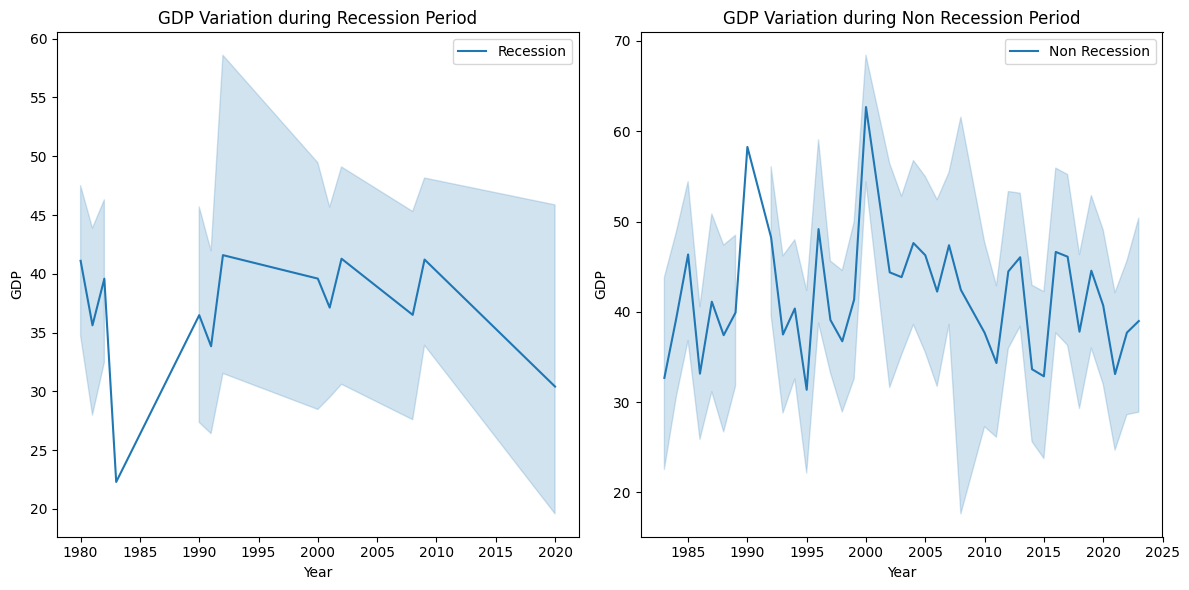

In [39]:
dfrecession=df[df['Recession'] == 1]
dfNonRecession=df[df['Recession'] == 0]

fig=plt.figure(figsize=(12,6))

sp1=fig.add_subplot(1,2,1)
sp2=fig.add_subplot(1,2,2)

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=dfrecession, label='Recession', ax=sp1)
sp1.set_xlabel('Year')
sp1.set_ylabel('GDP')
sp1.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=dfNonRecession, label='Non Recession',ax=sp2)
sp2.set_xlabel('Year')
sp2.set_ylabel('GDP')
sp2.set_title('GDP Variation during Non Recession Period')

plt.tight_layout()
plt.show()

## TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

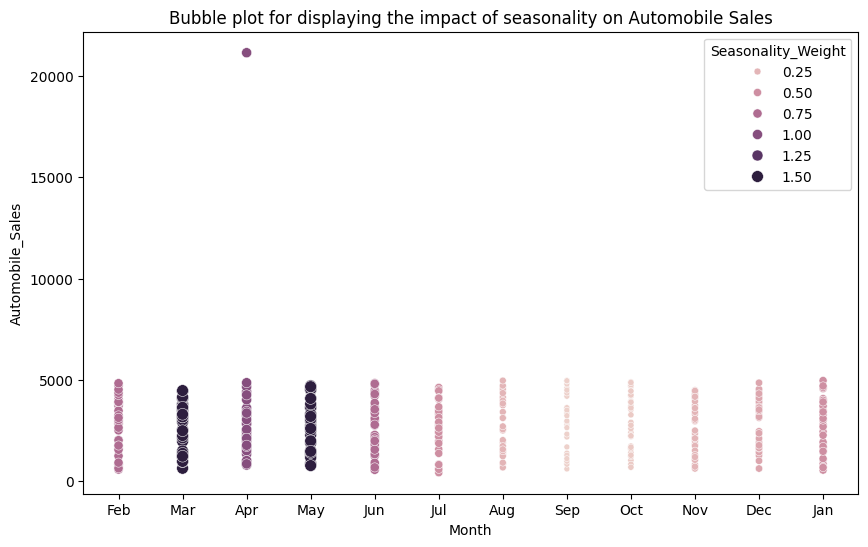

In [47]:
dfbub=df[df['Recession']==0]
size=dfbub['Seasonality_Weight']
fig= plt.figure(figsize=(10,6))

sns.scatterplot(data=dfbub,y='Automobile_Sales',x='Month',size=size, hue='Seasonality_Weight')
plt.title('Bubble plot for displaying the impact of seasonality on Automobile Sales')
plt.show()

## TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

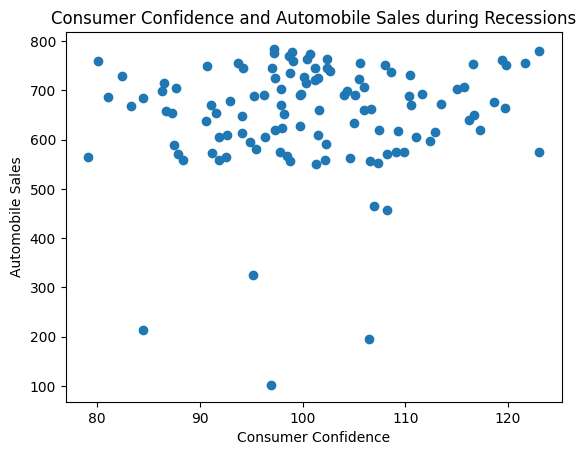

In [52]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.show()



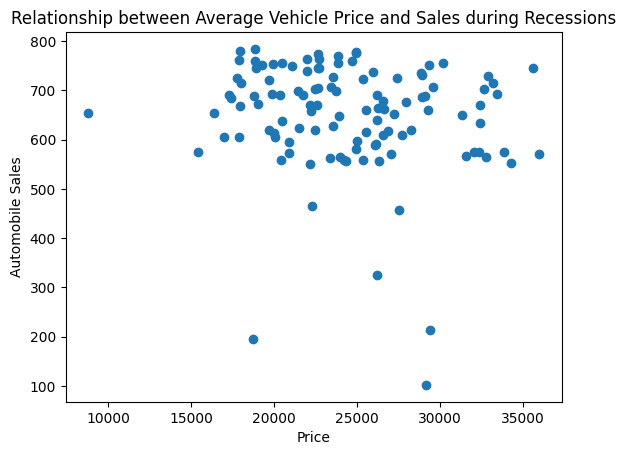

In [55]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

## TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

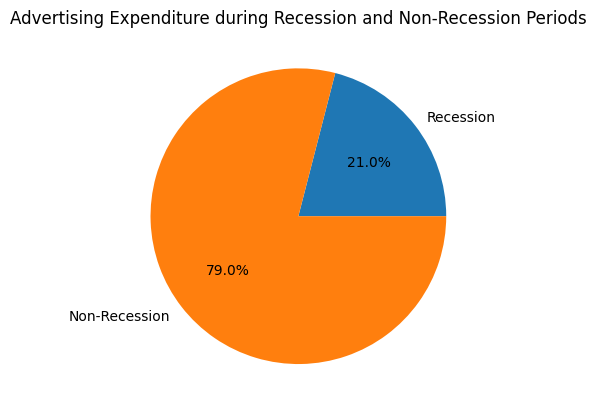

In [59]:
dfrecession=df[df['Recession'] == 1]
dfNonRecession=df[df['Recession'] == 0]

RecSum=dfrecession['Advertising_Expenditure'].sum()
NonRecSum=dfNonRecession['Advertising_Expenditure'].sum()
lbl=['Recession', 'Non-Recession']
plt.pie([RecSum,NonRecSum], autopct='%1.1f%%', labels=lbl)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()


## TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

Text(0.5, 1.0, 'Share of Each Vehicle Type in Total Expenditure during Recessions')

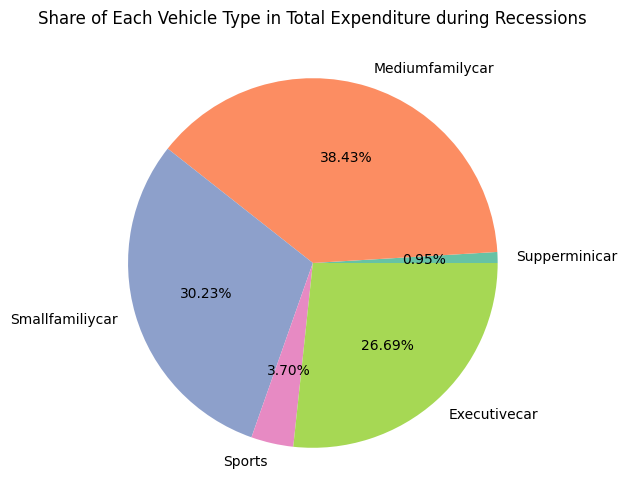

In [69]:
dfrecession=df[df['Recession'] == 1]

DFPIE=dfrecession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
fig= plt.figure(figsize=(10,6))
lbl=['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar']
plt.pie(DFPIE,labels=lbl,autopct='%0.2f%%',colors=sns.color_palette('Set2'))
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

## TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

<ipython-input-74-c32897942201>:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dfrec, x='unemployment_rate', y='Automobile_Sales',


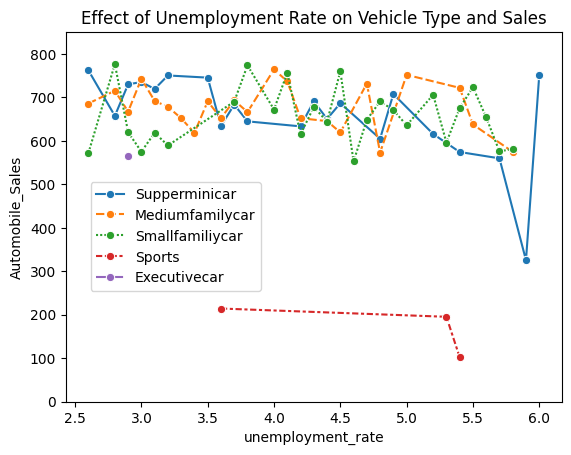

In [74]:
dfrec=df[df['Recession'] == 1]

sns.lineplot(data=dfrec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))